<a href="https://colab.research.google.com/github/Heerpatel703/NLP-Project/blob/main/quora_text_classification_live_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-classification with bag of words

outlines:

- Download and explore the data
-apply text classification techniques
-Implement the bag of word model
-Train ML models for text classification
-make predictions and submit to kaggle

## Download and explore the data

outline:

1. Download the dataset from kaggle to colab
2. Explore the data using pandas
3. Create a small working sample

## Download the Data to Colab

In [ ]:
!ls .

kaggle.json  sample_data


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [ ]:
IS_KAGGLE='KAGGLE_CONFIG_DIR' in os.environ

In [ ]:
if IS_KAGGLE:
  data_dir='/kaggle/input/quora-insincere-questions-classification'
  train_fname=data_dir+'/train.csv'
  test_fname=data_dir+ '/test.csv'
  sample_fname=data_dir+'/sample_submission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = "."
    !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
    train_fname='data/train.csv.zip'
    test_fname='data/test.csv.zip'
    sample_fname='data/sample_submission.csv.zip'

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [ ]:
!chmod 600 ./kaggle.json


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

 89% 49.0M/54.9M [00:00<00:00, 94.2MB/s]
100% 54.9M/54.9M [00:00<00:00, 99.5MB/s]


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

 63% 10.0M/15.8M [00:00<00:00, 40.6MB/s]
100% 15.8M/15.8M [00:00<00:00, 58.3MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 109MB/s]


## Explore the data using Pandas

In [ ]:
train_fname = 'data/train.csv'
test_fname = 'data/test.csv'
sample_fname = 'data/sample_submission.csv'

In [ ]:
import pandas as pd

In [ ]:
train_fname='data/train.csv.zip'

In [ ]:
!ls data

sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [ ]:
raw_df=pd.read_csv(train_fname)

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
sincere_df=raw_df[raw_df['target']==0]


In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
insincere__df=raw_df[raw_df['target']==1]

In [ ]:
insincere__df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [ ]:
raw_df.target.value_counts(normalize=True)

target
0    0.93813
1    0.06187
Name: proportion, dtype: float64

<Axes: xlabel='target'>

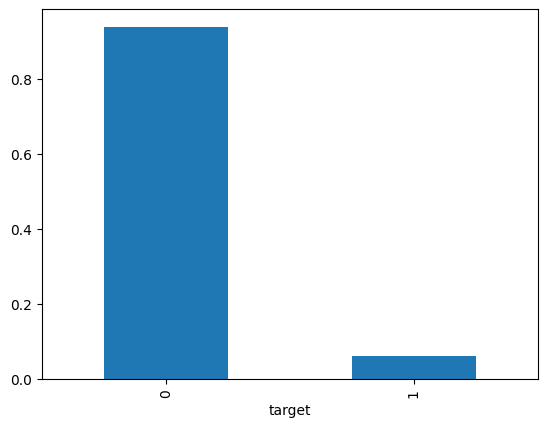

In [ ]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [ ]:
test_fname='data/test.csv.zip'

In [ ]:
test_df=pd.read_csv(test_fname)

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
sample_fname='data/sample_submission.csv.zip'

In [ ]:
sub_df=pd.read_csv(sample_fname)

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction.value_counts()

prediction
0    375806
Name: count, dtype: int64

## Create a working sample

In [ ]:
SAMPLE_SIZE=100_000

In [ ]:
sample_df=raw_df.sample(SAMPLE_SIZE,random_state=40)

In [ ]:
sample_df

,qid,question_text,target
46172,090a32edfa978443382d,How come Canada is able to avoid the wave of a...,0
484828,5ef02544eda0d547da06,What is the best drug of abuse testing / scree...,0
1188274,e8da9abceb74c98f8717,What are some commonly missed tax deductions?,0
361999,46f32898f191d1ecd1b4,CAN WE PUT MEMORY CARD in JIOFI?,0
1175967,e67474cea567757d091c,Why are so many US citizens hostile to the pro...,0
...,...,...,...
779814,98c1d9ba205fe9637fe1,At what point did you know your life wouldn't ...,0
553639,6c7ad7d7bf08f12fd985,Does firetrap has quality shoes and boots?,0
1213157,edc61ab86575d7fc31e2,What are some of Johnny Adams' major accomplis...,0
943648,b8ed1542a8a51f7d40fa,If Russia invaded Eastern Europe and the Balti...,0


# Text preprocessing Techniques##

Outline:

1.Understand the bag of words model
2.Tokenization
3.Stop word removal
4.Stemming

### Bag of Words Intuition

1.Create a list of all the words across all the text documnets
2. you convert each documents into vector counts of each word



Limitations:
1.There may be too many words in the dataset

2.Some words may occur too frequently

3.Some words may occur very rarely or only once

4.A single word may have many forms(go,gone,going or birdvs. birds)


In [ ]:
q0=sincere_df.question_text.values[1]

In [ ]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [ ]:
q1=raw_df[raw_df['target']==1].question_text.values[0]

In [ ]:
q1

'Has the United States become the largest dictatorship in the world?'

### Tokenization

Splitting a document into words and separators

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt') # Download the necessary data for tokenization
from nltk.tokenize import word_tokenize

q1 = "Has the United States become the largest dictatorship in the world?" # Example string
word_tokenize(q1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
q0_tok=word_tokenize(q0)
q1_tok=word_tokenize(q1)

### Stop Word removal

Removing commonly occuring words

In [ ]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords=stopwords.words('english')

In [ ]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in english_stopwords]

In [ ]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [ ]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
q0_stp=remove_stopwords(q0_tok)

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q1_stp=remove_stopwords(q1_tok)

In [ ]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

## Sremming

"go","gone","going"->"go""birds","bird"->"bird"

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer=SnowballStemmer(language='english')

In [ ]:
stemmer.stem("going")

'go'

In [ ]:
stemmer.stem("supposedly")

'suppos'

In [ ]:
q0_stm=[stemmer.stem(word) for word in q0_stp]

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [ ]:
q1_stm=[stemmer.stem(word) for word in q1_stp]

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [ ]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

## Lemmatization


"love"->"love"
"loving"->"love"
"lovable"->"love"

# Implement Bag of words##

Outline:
1.Create a vocabulary using count vectorizer
2. Transform text to vectors using count vectorizer
3.Congigure text preprocessing in count vectorizer

### Create a vocabulary

In [ ]:
sample_df

,qid,question_text,target
46172,090a32edfa978443382d,How come Canada is able to avoid the wave of a...,0
484828,5ef02544eda0d547da06,What is the best drug of abuse testing / scree...,0
1188274,e8da9abceb74c98f8717,What are some commonly missed tax deductions?,0
361999,46f32898f191d1ecd1b4,CAN WE PUT MEMORY CARD in JIOFI?,0
1175967,e67474cea567757d091c,Why are so many US citizens hostile to the pro...,0
...,...,...,...
779814,98c1d9ba205fe9637fe1,At what point did you know your life wouldn't ...,0
553639,6c7ad7d7bf08f12fd985,Does firetrap has quality shoes and boots?,0
1213157,edc61ab86575d7fc31e2,What are some of Johnny Adams' major accomplis...,0
943648,b8ed1542a8a51f7d40fa,If Russia invaded Eastern Europe and the Balti...,0


In [ ]:
small_df=sample_df[:5]

In [ ]:
small_df

,qid,question_text,target
46172,090a32edfa978443382d,How come Canada is able to avoid the wave of a...,0
484828,5ef02544eda0d547da06,What is the best drug of abuse testing / scree...,0
1188274,e8da9abceb74c98f8717,What are some commonly missed tax deductions?,0
361999,46f32898f191d1ecd1b4,CAN WE PUT MEMORY CARD in JIOFI?,0
1175967,e67474cea567757d091c,Why are so many US citizens hostile to the pro...,0


In [ ]:
small_df.question_text.values

array(['How come Canada is able to avoid the wave of alt-right populism sweeping Western democracies?',
       'What is the best drug of abuse testing / screening market now a days?',
       'What are some commonly missed tax deductions?',
       'CAN WE PUT MEMORY CARD in JIOFI?',
       'Why are so many US citizens hostile to the provision of healthcare for all?'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
small_vect=CountVectorizer()

In [ ]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [ ]:
small_vect.get_feature_names_out()

array(['able', 'abuse', 'all', 'alt', 'are', 'avoid', 'best', 'can',
       'canada', 'card', 'citizens', 'come', 'commonly', 'days',
       'deductions', 'democracies', 'drug', 'for', 'healthcare',
       'hostile', 'how', 'in', 'is', 'jiofi', 'many', 'market', 'memory',
       'missed', 'now', 'of', 'populism', 'provision', 'put', 'right',
       'screening', 'so', 'some', 'sweeping', 'tax', 'testing', 'the',
       'to', 'us', 'wave', 'we', 'western', 'what', 'why'], dtype=object)

### Transform documents into vectors

In [ ]:
vectors=small_vect.transform(small_df.question_text)

In [ ]:
vectors

<5x48 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [ ]:
vectors.shape

(5, 48)

In [ ]:
small_df.question_text.values[0]

'How come Canada is able to avoid the wave of alt-right populism sweeping Western democracies?'

In [ ]:
vectors[0].toarray()

array([[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0]])

In [ ]:
vectors.toarray()

array([[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1]])

### Configure Count Vectorizer Parameters

In [ ]:
stemmer=SnowballStemmer(language='english')

In [ ]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text) if word.lower() not in english_stopwords]

In [ ]:
tokenize('what is the really (dealing) here?')

['realli', '(', 'deal', ')', '?']

In [ ]:
vectorizer=CountVectorizer(lowercase=True,
                           tokenizer=tokenize,
                           stop_words=english_stopwords,
                           max_features=1000)

In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


CPU times: user 23.2 s, sys: 96.2 ms, total: 23.3 s
Wall time: 28.3 s


CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7c3417bac280>)

In [ ]:
%%time
vectorizer.fit(sample_df.question_text)  # Fit the vectorizer to your data

len(vectorizer.vocabulary_)  # Now you can access the vocabulary_ attribute

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


CPU times: user 31.9 s, sys: 148 ms, total: 32.1 s
Wall time: 34.3 s


1000

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '30', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``',
       'abl', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'acid', 'act', 'action', 'activ', 'actor',
       'actual', 'ad', 'add', 'address', 'admiss', 'adult', 'advanc',
       'advantag', 'advic', 'affect', 'africa', 'african', 'age', 'agre',
       'air', 'allow', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'among', 'amount', 'analysi',
       'ancient', 'android', 'anim', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'atheist',
       'attack', 'attempt', 'attend'], dtype=object)

In [ ]:
%%time
inputs=vectorizer.transform(sample_df.question_text)

CPU times: user 31.6 s, sys: 107 ms, total: 31.7 s
Wall time: 32.1 s


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
inputs

<100000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 521755 stored elements in Compressed Sparse Row format>

In [ ]:
sample_df.question_text.values[0]

'How come Canada is able to avoid the wave of alt-right populism sweeping Western democracies?'

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
%%time
test_inputs=vectorizer.transform(test_df.question_text)

CPU times: user 2min, sys: 418 ms, total: 2min
Wall time: 2min 9s


##ML Models for the text Classification##

Outline:

-create a training & validation set

-Train a logistic regression model

-make predictions on training validation & test data

### Split into Training and validation set

In [ ]:
sample_df

,qid,question_text,target
46172,090a32edfa978443382d,How come Canada is able to avoid the wave of a...,0
484828,5ef02544eda0d547da06,What is the best drug of abuse testing / scree...,0
1188274,e8da9abceb74c98f8717,What are some commonly missed tax deductions?,0
361999,46f32898f191d1ecd1b4,CAN WE PUT MEMORY CARD in JIOFI?,0
1175967,e67474cea567757d091c,Why are so many US citizens hostile to the pro...,0
...,...,...,...
779814,98c1d9ba205fe9637fe1,At what point did you know your life wouldn't ...,0
553639,6c7ad7d7bf08f12fd985,Does firetrap has quality shoes and boots?,0
1213157,edc61ab86575d7fc31e2,What are some of Johnny Adams' major accomplis...,0
943648,b8ed1542a8a51f7d40fa,If Russia invaded Eastern Europe and the Balti...,0


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs,sample_df.target,test_size=0.2,random_state=40)

In [ ]:
train_inputs.shape

(80000, 1000)

In [ ]:
train_targets.shape

(80000,)

In [ ]:
val_inputs.shape

(20000, 1000)

In [ ]:
val_targets.shape

(20000,)

### Train Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000,solver='sag')

In [ ]:
%%time
model.fit(train_inputs,train_targets)

CPU times: user 11.6 s, sys: 12.2 ms, total: 11.7 s
Wall time: 11.7 s


LogisticRegression(max_iter=1000, solver='sag')

### Make Predictions using the model

In [ ]:
train_preds=model.predict(train_inputs)

In [ ]:
train_targets

1022774    0
863992     0
653515     0
962746     0
1146509    0
          ..
181795     0
1213858    0
1294406    0
752789     0
635448     0
Name: target, Length: 80000, dtype: int64

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.Series(train_preds).value_counts()

0    77925
1     2075
Name: count, dtype: int64

In [ ]:
pd.Series(train_targets).value_counts()

target
0    75143
1     4857
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets,train_preds)

0.9474

In [ ]:
import numpy as np

In [ ]:
accuracy_score(train_targets,np.zeros(len(train_targets)))

0.9392875

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(train_targets,train_preds)

0.3929601846508944

In [ ]:
f1_score(train_targets,np.zeros(len(train_targets)))

0.0

In [ ]:
random_preds=np.random.choice((0,1),len(train_targets))
f1_score(train_targets,random_preds)

0.10622202327663385

In [ ]:
val_preds=model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets,val_preds)

0.94625

In [ ]:
f1_score(val_targets,val_preds)

0.3731778425655977

In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
insincere__df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [ ]:
insincere__df.target.values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.predict(vectorizer.transform(insincere__df.question_text.values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

## Make prediction and submit to kaggle##


In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
test_inputs.shape

(375806, 1000)

In [ ]:
train_preds=model.predict(test_inputs)

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
test_preds = model.predict(test_inputs)  # Generate predictions

sub_df.prediction = test_preds

In [ ]:
sub_df.prediction.value_counts()

prediction
0    366162
1      9644
Name: count, dtype: int64

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.to_csv('submission.csv',index=None)

In [ ]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,0
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,0
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,0
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,0
